In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Data augmentation

In [8]:
from scipy.ndimage.interpolation import shift
augment = lambda img, dx, dy: shift(img, (dx, dy))
shift_left = lambda img: augment(img, 0, 1)
shift_right = lambda img: augment(img, 0, -1)
shift_up = lambda img: augment(img, -1, 0)
shift_down = lambda img: augment(img, 1, 0)

Text(0.5, 1.0, 'Shift down')

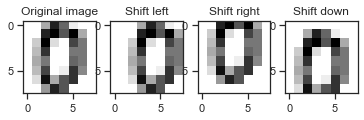

In [21]:
from sklearn.datasets import load_digits
sns.set_style('ticks')
digits = load_digits()

img = digits.images[0]
plt.subplot(141)
plt.imshow(img, cmap = 'binary')
plt.title('Original image')
plt.subplot(142)
plt.imshow(shift_left(img), cmap = 'binary')
plt.title('Shift left')
plt.subplot(143)
plt.imshow(shift_up(img), cmap = 'binary')
plt.title('Shift right')
plt.subplot(144)
plt.imshow(shift_down(img), cmap = 'binary')
plt.title('Shift down')

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size = .8, random_state = 42)
X_train_augment = list(X_train)
y_train_augment = list(y_train)
shifts = [shift_left, shift_right, shift_up, shift_down]
for img, label in zip(X_train, y_train):
    img = img.reshape((8,8))
    for s in shifts:
        X_train_augment.append(s(img))
        y_train_augment.append(label)

In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), SVC())
params = {
    'svc__C' : [.001, .01, .1, 1, 10, 100, 1000],
    'svc__gamma' : [.001, .01, .1, 1, 10, 100]
}

grid = GridSearchCV(pipe, params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
        

In [33]:
grid.best_params_

{'svc__C': 100, 'svc__gamma': 0.01}

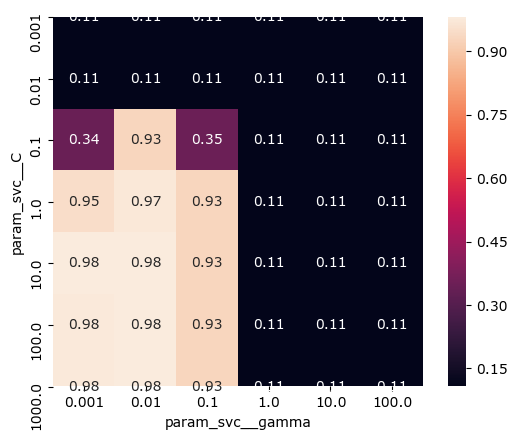

In [41]:
plt.style.use('default')
df = pd.DataFrame(grid.cv_results_)
pivot = df.pivot('param_svc__C', 'param_svc__gamma', 'mean_test_score')
sns.heatmap(pivot, annot = True, square = True)

In [31]:
'Best cross_validation score: %.2f' % grid.best_score_

'Best cross_validation score: 0.98'

In [32]:
'Test score: {}'.format(grid.score(X_test, y_test))

'Test score: 0.9805555555555555'

# Spam dectection

In [42]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [43]:
fetch_spam_data()

In [44]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [45]:
ham_filenames

['00001.7c53336b37003a9286aba55d2945844c',
 '00002.9c4069e25e1ef370c078db7ee85ff9ac',
 '00003.860e3c3cee1b42ead714c5c874fe25f7',
 '00004.864220c5b6930b209cc287c361c99af1',
 '00005.bf27cdeaf0b8c4647ecd61b1d09da613',
 '00006.253ea2f9a9cc36fa0b1129b04b806608',
 '00007.37a8af848caae585af4fe35779656d55',
 '00008.5891548d921601906337dcf1ed8543cb',
 '00009.371eca25b0169ce5cb4f71d3e07b9e2d',
 '00010.145d22c053c1a0c410242e46c01635b3',
 '00011.fbcde1b4833bdbaaf0ced723edd6e355',
 '00012.48a387bc38d1316a6f6b49e8c2e43a03',
 '00013.81c34741dbed59c6dde50777e27e7ea3',
 '00014.cb20e10b2bfcb8210a1c310798532a57',
 '00015.4d7026347ba7478c9db04c70913e68fd',
 '00016.ef397cef16f8041242e3b6560e168053',
 '00017.08ef2d89f14cf7e2a458b80697eb1837',
 '00018.6fee38026193b5adde4b56892a6f14bc',
 '00019.5322cb10d8819b39499924d852819c27',
 '00020.d10651e31fcb92630c6229ec773cfe26',
 '00021.607c41268c5b0d66e81b58713a66d12c',
 '00022.48098f942c31097d2ef605df44dd8593',
 '00023.e0e815ea1d7fd40e7e70b4c0035bef0c',
 '00024.59c

# Titanic Dataset

In [46]:
os.chdir(r'C:\Users\dell\PycharmProjects\MachineLearning\Pandas\datasets')

In [50]:
train_data = pd.read_csv('./titanic/train.csv')
test_data = pd.read_csv('./titanic/test.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The attributes have the following meaning:
<ul>
<li><b>Survived</b>: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.</li>
    <li><b>Pclass</b>: passenger class.</li>
    <li><b>Name, Sex, Age</b>: self-explanatory</li>
    <li><b>SibSp</b>: how many siblings & spouses of the passenger aboard the Titanic.</li>
    <li><b>Parch</b>: how many children & parents of the passenger aboard the Titanic.</li>
    <li><b>Ticket</b>: ticket id</li>
    <li><b>Fare</b>: price paid (in pounds)</li>
    <li><b>Cabin</b>: passenger's cabin number</li>
    <li><b>Embarked</b>: where the passenger embarked the Titanic</li>
</ul>

In [70]:
stat = train_data.groupby(['Pclass', 'Sex'], as_index = False)['Survived'].sum()
stat

,Pclass,Sex,Survived
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


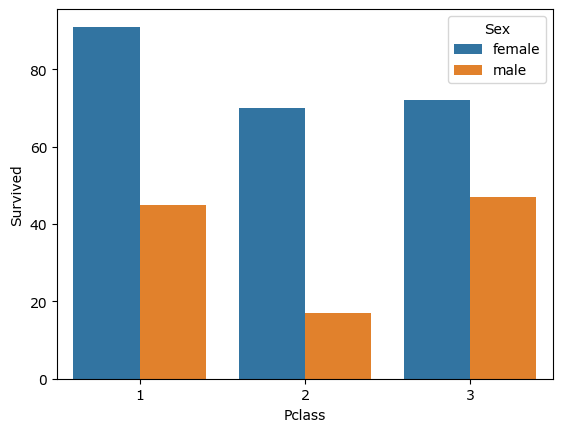

In [71]:
sns.barplot(data = stat, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [72]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
